
# Data Quality Assessment and Exploration: Iris Dataset

## Objective:
The purpose of this task is to perform a comprehensive data quality assessment and exploration of a given dataset. 
We will generate key visualizations and reports to understand the data distribution, detect patterns, and address any data quality issues, such as missing or incorrect data.

## Steps:
1. **Load the Dataset**
2. **Data Quality Report**
3. **Data Exploration**
4. **Dealing with Missing Data**
5. **Handling Incorrect Data**
6. **Final Data Summary**



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv("./data/iris_mod.csv")

# Display random 5 rows
data.sample(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Quality
149,150,NaN,3.0,5.1,1.8,Iris-virginica,High
99,100,NaN,2.8,4.1,1.3,Iris-versicolor,High
127,128,6.1,3.0,NaN,1.8,Iris-virginica,High
52,53,6.9,NaN,4.9,NaN,Iris-versicolor,High
105,106,NaN,3.0,6.6,2.1,Iris-virginica,High


In [2]:
probabilities = [0.8, 0.2]

# Create a new 'quality' column with random choices of "High" and "Low"
data['Quality'] = np.random.choice(['High', 'Low'], size=len(data), p=probabilities)
data.to_csv('iris_mod.csv', index=False)

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Quality
0,1,NaN,3.5,1.4,0.2,Iris-setosa,Low
1,2,4.9,NaN,NaN,0.2,Iris-setosa,High
2,3,4.7,3.2,NaN,0.2,Iris-setosa,High
3,4,4.6,NaN,1.5,0.2,Iris-setosa,High
4,5,NaN,3.6,1.4,0.2,Iris-setosa,High
...,...,...,...,...,...,...,...
145,146,6.7,3.0,NaN,2.3,Iris-virginica,High
146,147,6.3,2.5,5.0,1.9,Iris-virginica,High
147,148,6.5,3.0,5.2,2.0,Iris-virginica,High
148,149,6.2,3.4,5.4,2.3,Iris-virginica,High


In [4]:

# Missing Data Analysis
missing_data = data.isnull().sum()
missing_percentage = (missing_data / data.shape[0]) * 100

# Create a DataFrame using the two arrays
missing_df = pd.DataFrame({
    'Missing Data': missing_data,
    'Missing Percentage': missing_percentage
}, index=data.columns)

# Filter to include only rows with non-zero missing data
missing_df_filtered = missing_df[missing_df['Missing Data'] > 0]

# Display the filtered DataFrame
missing_df_filtered


,Missing Data,Missing Percentage
SepalLengthCm,34,22.666667
SepalWidthCm,19,12.666667
PetalLengthCm,30,20.000000
PetalWidthCm,31,20.666667
Species,20,13.333333


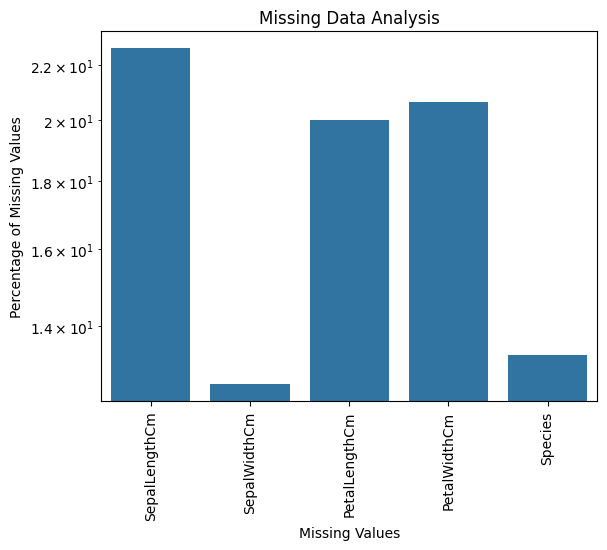

In [5]:
# Visualize missing data using a bar plot
ax = sns.barplot(x=missing_df_filtered.index, y=missing_df_filtered['Missing Percentage'])
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Missing Values')
plt.title('Missing Data Analysis')

# Adjust the rotation and alignment of x-tick labels
ax.tick_params(axis='x', rotation=90)

# Apply a logarithmic scale to the y-axis
ax.set_yscale('log')

# Annotate small values directly on the bars
for p in ax.patches:
    height = p.get_height()
    if height < 1:  # Annotate only for small values
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)


In [6]:

# Display data types and summary statistics
data_types = data.dtypes
print(data_types)
summary_statistics = data.describe()
summary_statistics

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
Quality           object
dtype: object


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,116.000000,131.000000,120.000000,119.000000
mean,75.500000,5.826724,3.065649,3.711667,1.230252
std,43.445368,0.826765,0.439890,1.734242,0.751784
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.575000,0.350000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.350000,5.100000,1.800000
max,150.000000,7.700000,4.400000,6.900000,2.500000


In [7]:

# Handle missing data

# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Fill missing values in numerical columns with the median
data[numerical_columns] = data[numerical_columns].apply(lambda col: col.fillna(col.median()))

# Fill missing values in categorical columns with the mode
data[categorical_columns] = data[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))



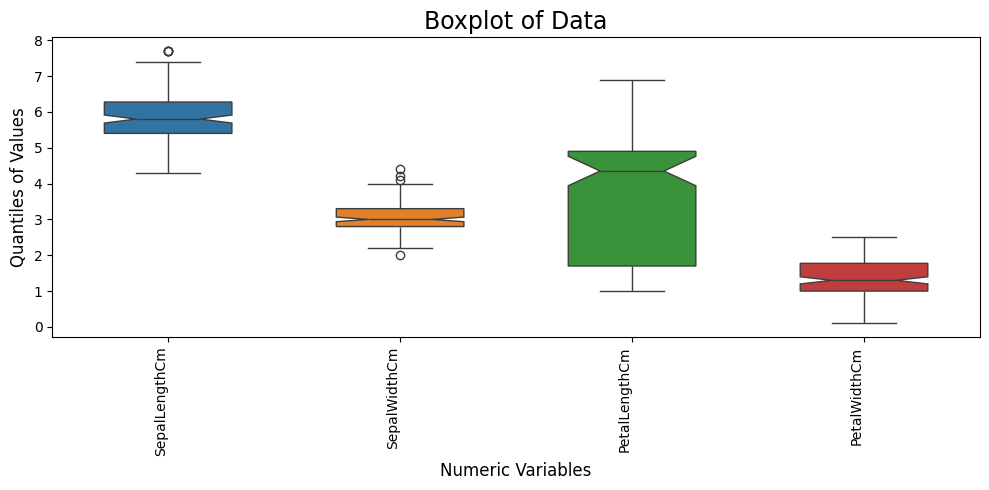

In [8]:

# Ensure only true numerical columns are included
numeric_data = data.select_dtypes(include=['number'])
numeric_data = numeric_data.drop(['Id'], axis=1)

# Boxplot function using Seaborn
plt.figure(figsize=(10, 5))
sns.boxplot(data=numeric_data, notch=True, width=0.55)

# Set titles and labels
plt.title('Boxplot of Data', fontsize=17)
plt.xlabel('Numeric Variables', fontsize=12)
plt.ylabel('Quantiles of Values', fontsize=12)

# Adjust x-axis labels
plt.xticks(rotation=90, ha='right', fontsize=10)

# Show the plot
plt.tight_layout()


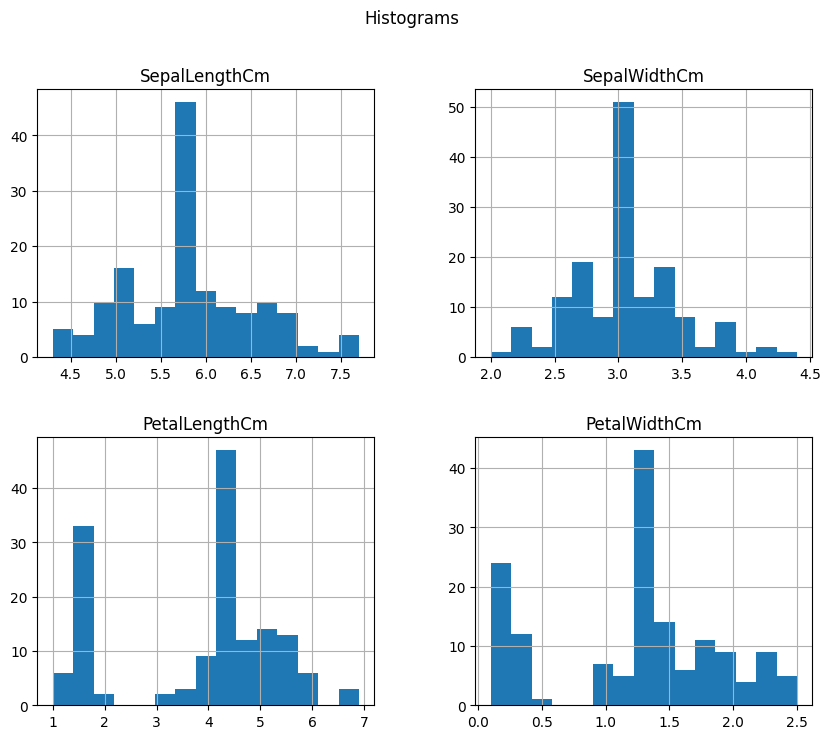

In [9]:

# Histograms for numerical columns
numeric_data.hist(figsize=(10, 8), bins=15)
plt.suptitle('Histograms')
plt.show()


Text(0.5, 1.0, 'Distribution of Target Variable')

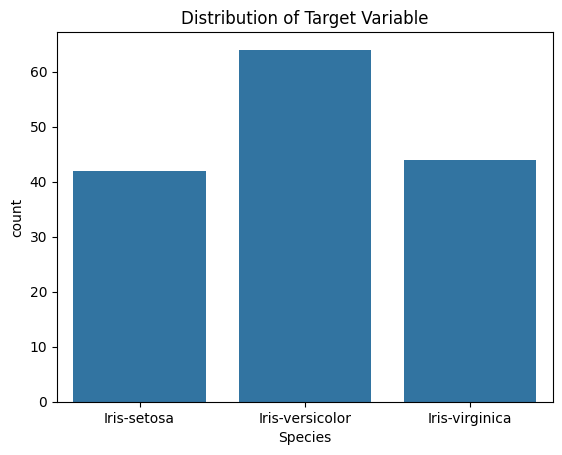

In [10]:

# Bar plot for the Species variable
sns.countplot(x='Species', data=data)
plt.title('Distribution of Target Variable')

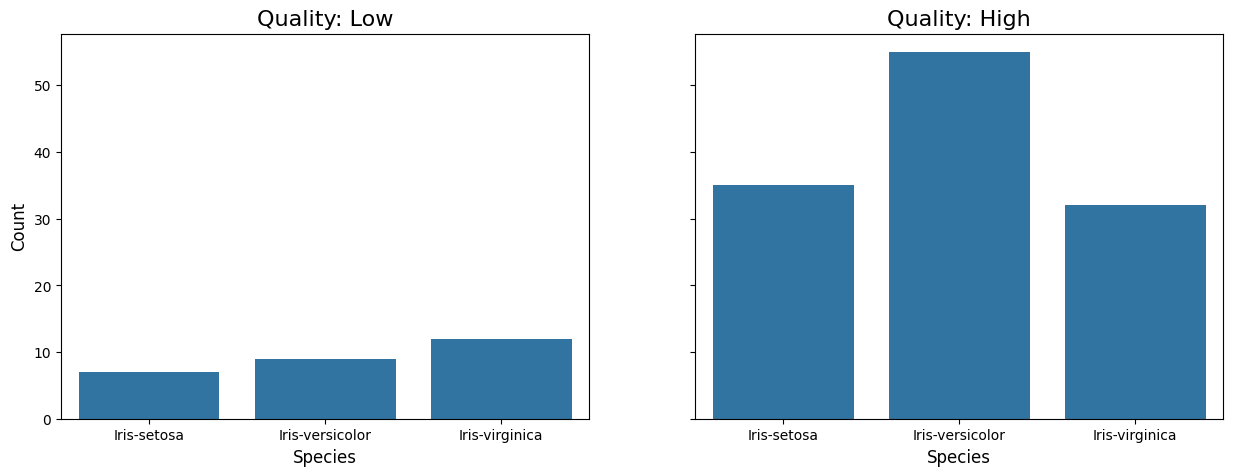

In [11]:
# Define the categorical variables
categorical_column1 = 'Quality'
categorical_column2 = 'Species'

# Get the unique categories in the first categorical column
categories = data[categorical_column1].unique()

# Create subplots with as many columns as there are categories
fig, axes = plt.subplots(1, len(categories), figsize=(15, 5), sharey=True)

# Iterate through each category in categorical_column1 (e.g., Quality)
for i, category in enumerate(categories):
    # Filter data for the specific category
    category_data = data[data[categorical_column1] == category]
    
    # Create a bar plot for the second categorical variable (e.g., Species) in the corresponding subplot
    sns.countplot(data=category_data, x=categorical_column2, ax=axes[i])
    axes[i].set_title(f'{categorical_column1}: {category}', fontsize=16)
    axes[i].set_xlabel(categorical_column2, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)





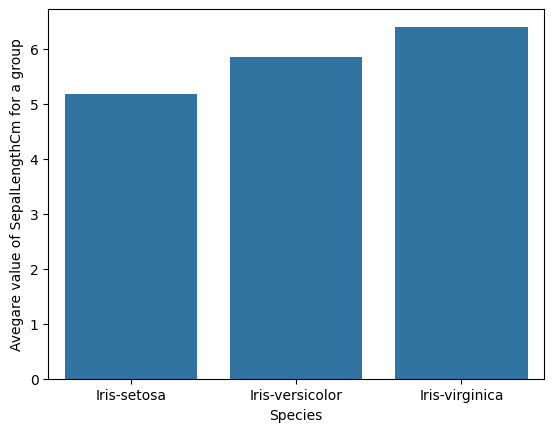

In [12]:
df = data.groupby('Species', as_index=False)['SepalLengthCm'].mean()
sns.barplot(x='Species', y='SepalLengthCm', data=df)
plt.xlabel('Species')
plt.ylabel('Avegare value of SepalLengthCm for a group');

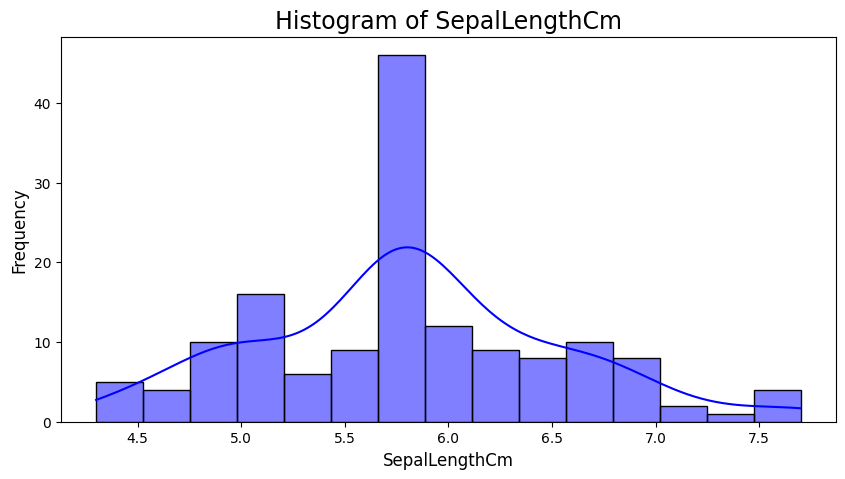

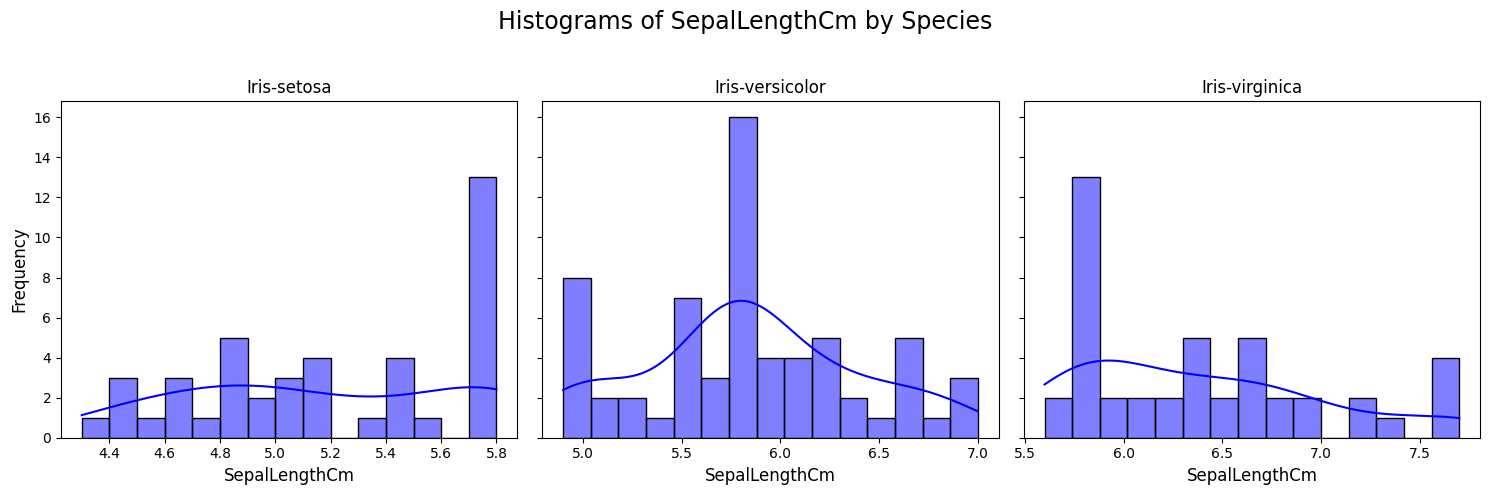

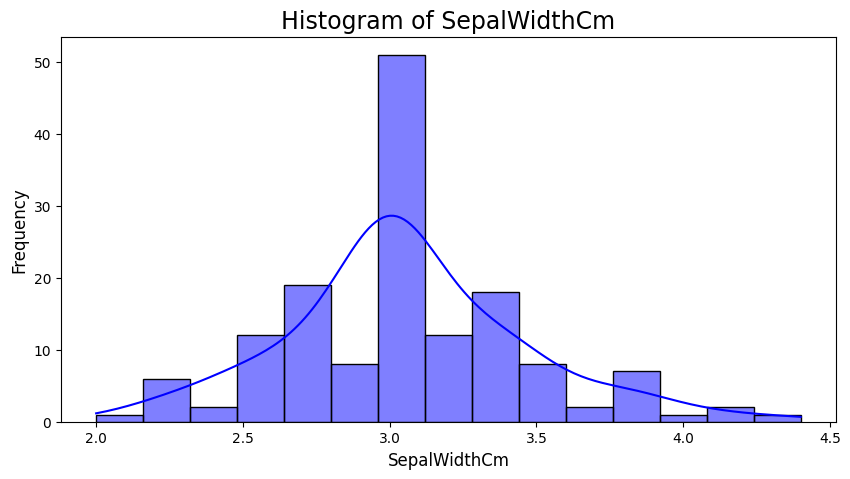

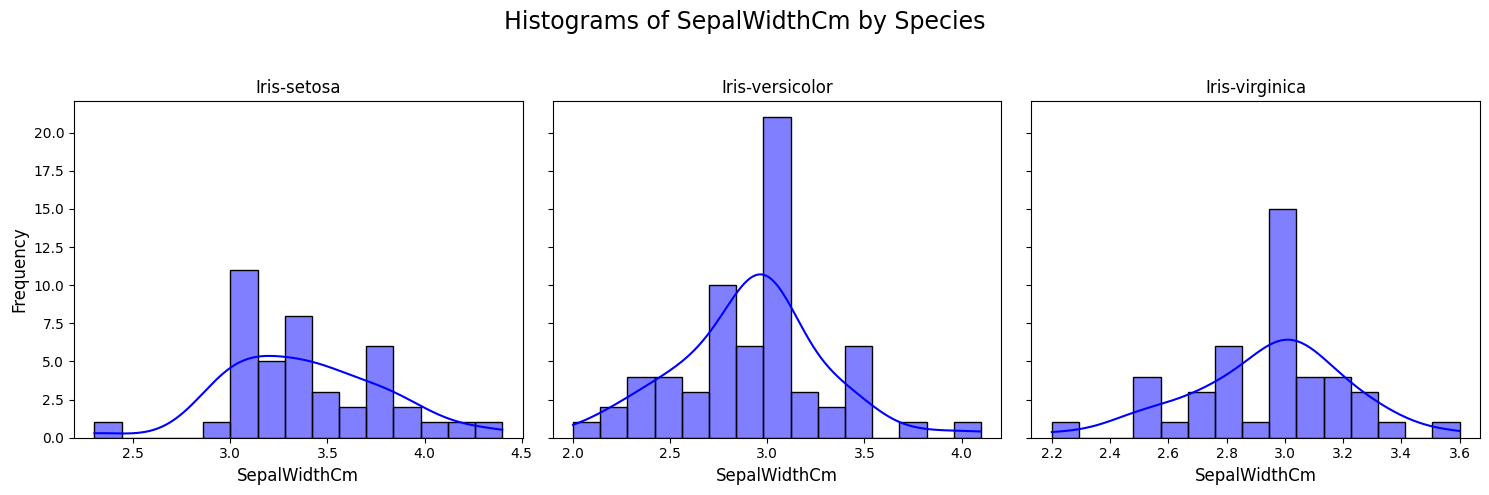

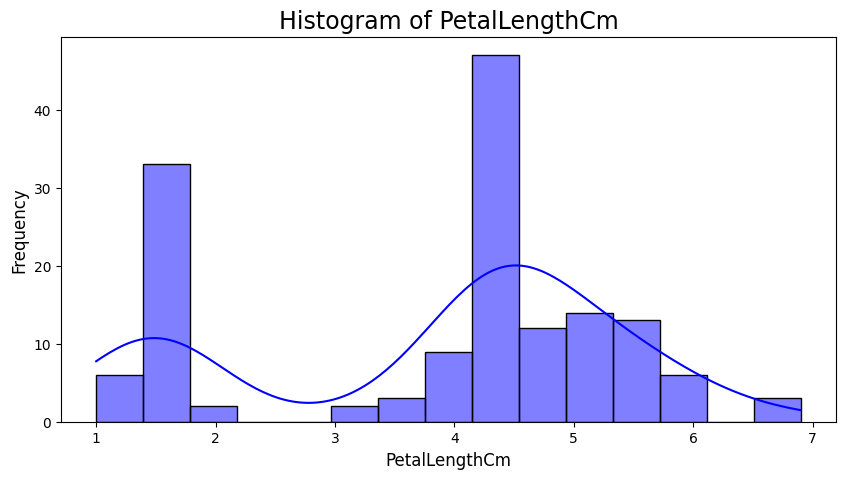

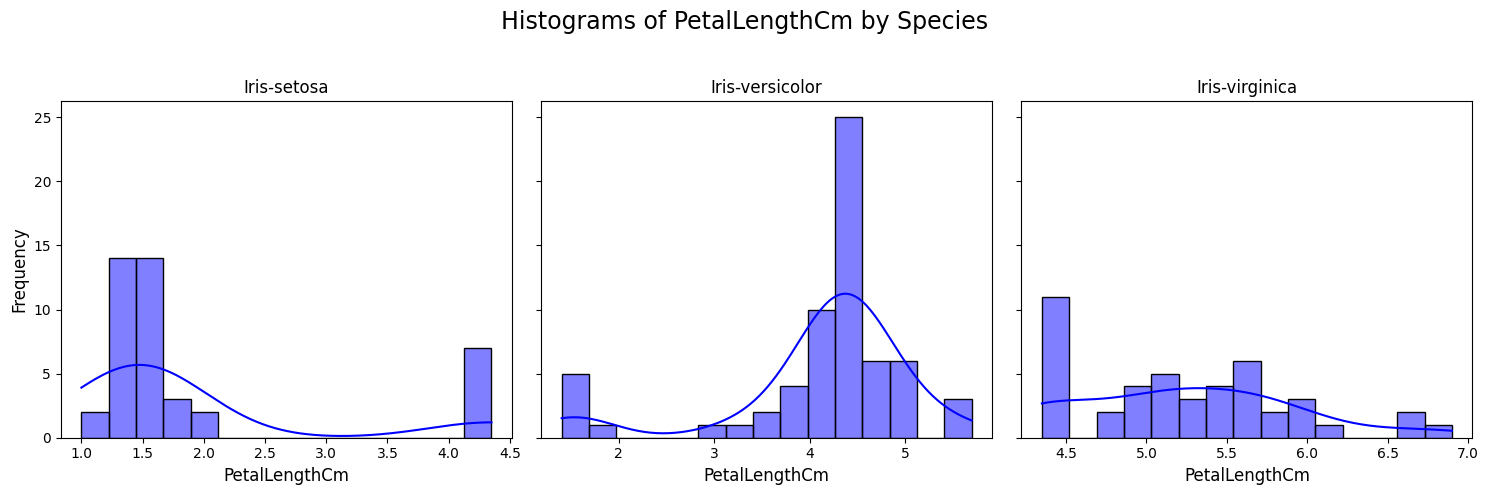

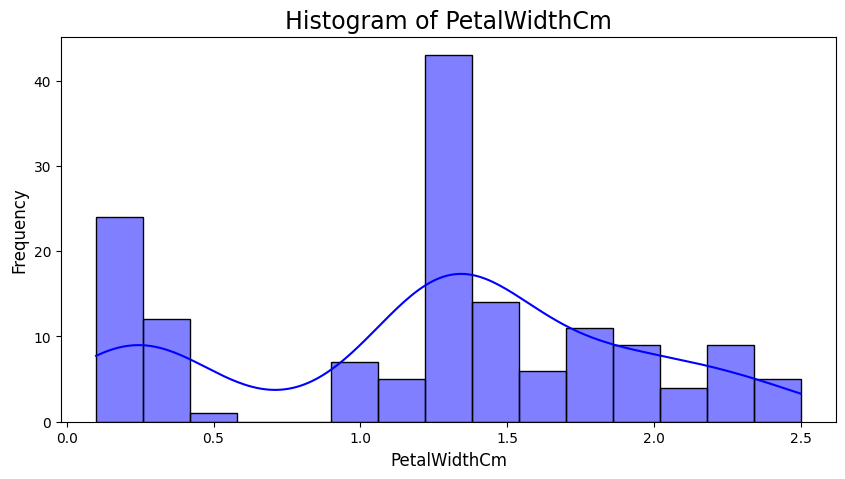

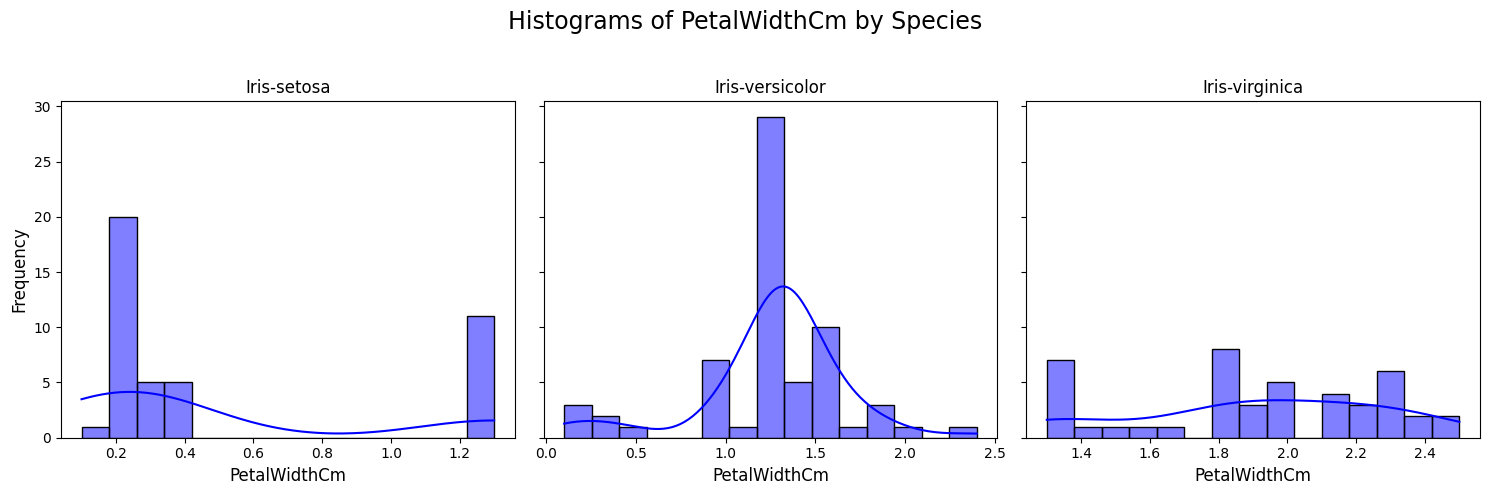

In [13]:
# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('Id')
categorical_column = 'Species'  # Choose the relevant categorical column


# Iterate through each numerical feature
for col in numerical_columns:
    # Plot histogram for the numerical column
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True, bins=15, color='blue')
    plt.title(f'Histogram of {col}', fontsize=17)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Create subplots: one row, with one subplot for each category
    categories = data[categorical_column].unique()
    fig, axes = plt.subplots(1, len(categories), figsize=(15, 5), sharey=True)
    fig.suptitle(f'Histograms of {col} by {categorical_column}', fontsize=17)
    

    # Iterate through each category and plot in a separate subplot
    for i, category in enumerate(categories):
        category_data = data[data[categorical_column] == category]
        
        # Plot histogram for each category in its own subplot
        sns.histplot(category_data[col], kde=True, bins=15, color='blue', ax=axes[i])
        axes[i].set_title(f'{category}')
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Frequency', fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.95])

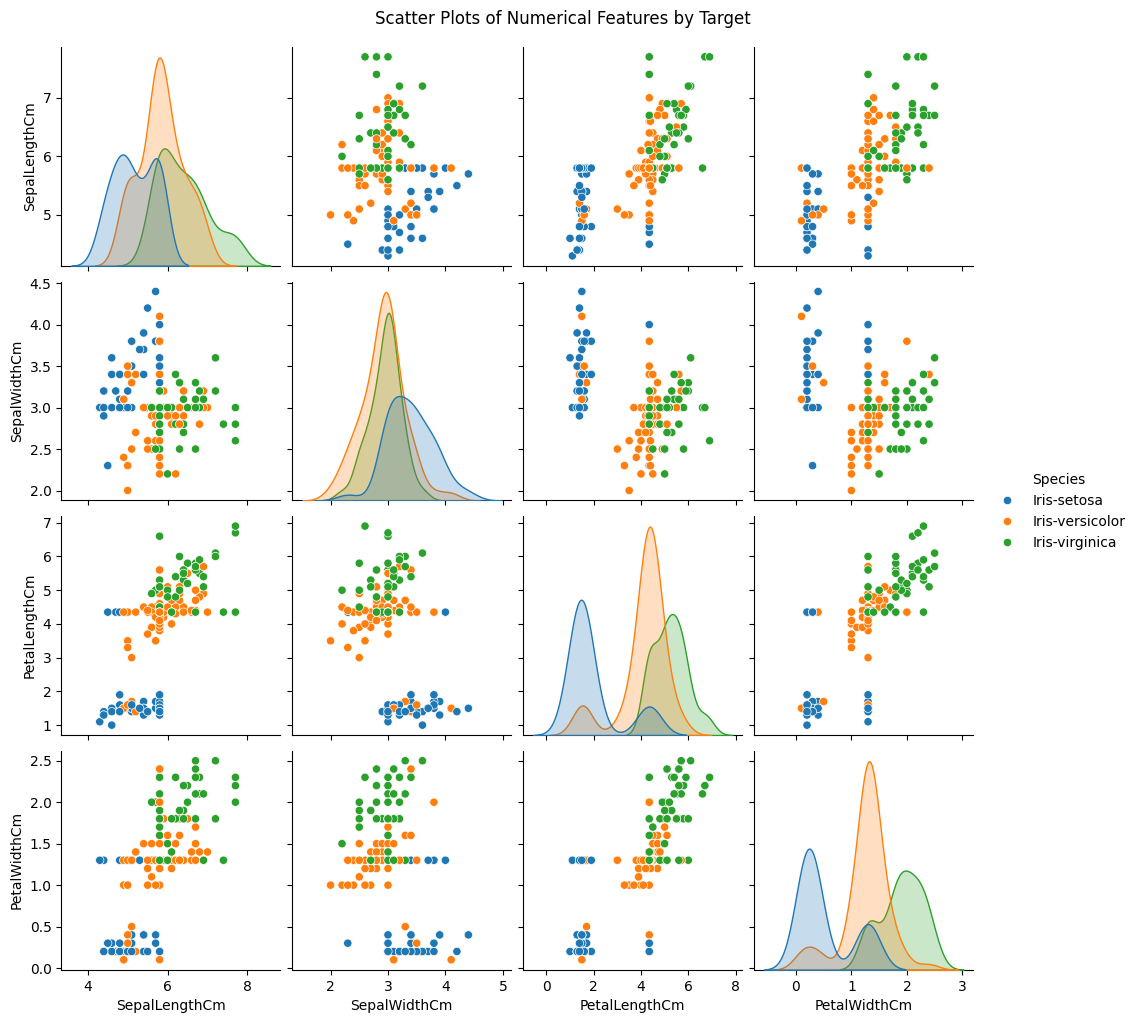

In [14]:

# Scatter plots for pairs of numerical columns
sns.pairplot(data.drop(['Id'], axis=1), hue='Species')
plt.suptitle('Scatter Plots of Numerical Features by Target', y=1.02)
plt.show()


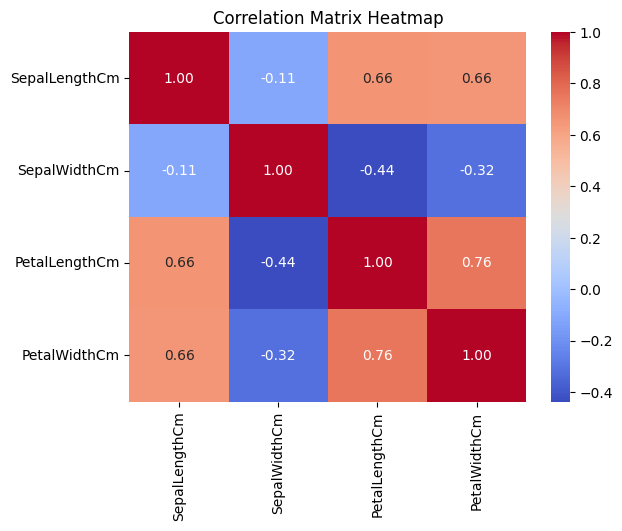

In [15]:

# Calculate and visualize the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [20]:

# Handling incorrect or outlier data
# Outliers are subjective for this dataset, but I can demonstrate how to remove extreme values.

# Example: Removing rows where sepal length is less than 4 or greater than 8 (as a hypothetical)
df_cleaned = data[(data['SepalLengthCm'] >= 4) & (data['SepalLengthCm'] <= 8)]

# Display the cleaned dataset
df_cleaned.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Quality
0,1,5.8,3.5,1.40,0.2,Iris-setosa,Low
1,2,4.9,3.0,4.35,0.2,Iris-setosa,High
2,3,4.7,3.2,4.35,0.2,Iris-setosa,High
3,4,4.6,3.0,1.50,0.2,Iris-setosa,High
4,5,5.8,3.6,1.40,0.2,Iris-setosa,High


In [21]:
# Clamp the values in the 'SepalLengthCm' column between 4 and 8
# This way, no rows are removed; instead, the values are transformed to fit within the desired range
# I copy the data in order to keep both versions of cleaning
clamped_data = data.copy()
clamped_data['SepalLengthCm'] = clamped_data['SepalLengthCm'].clip(lower=4, upper=6)
clamped_data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Quality
132,133,6.0,2.8,5.60,2.2,Iris-virginica,High
52,53,6.0,3.0,4.90,1.3,Iris-versicolor,High
45,46,4.8,3.0,1.40,0.3,Iris-setosa,Low
9,10,4.9,3.1,1.50,0.1,Iris-setosa,High
79,80,5.7,2.6,3.50,1.0,Iris-versicolor,High
91,92,6.0,3.0,4.35,1.3,Iris-versicolor,High
125,126,6.0,3.2,6.00,1.8,Iris-virginica,High
109,110,6.0,3.6,6.10,2.5,Iris-virginica,High
117,118,6.0,3.0,6.70,2.2,Iris-virginica,High
105,106,5.8,3.0,6.60,2.1,Iris-virginica,High


In [22]:

# Final data summary after cleaning
print(f"Original dataset shape: {data.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

df_cleaned.describe()


Original dataset shape: (150, 7)
Cleaned dataset shape: (150, 7)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.820667,3.057333,3.839333,1.244667
std,43.445368,0.726423,0.411471,1.570882,0.669622
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.400000,2.800000,1.700000,1.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.275000,3.300000,4.900000,1.775000
max,150.000000,7.700000,4.400000,6.900000,2.500000
